**TP 1 : Machine Learning pour le contrôle de qualité**

**1. Objectif**

L’objectif de ce TP est de développer un modèle de classification pour le contrôle qualité des puces
semi-conductrices.

In [132]:
!pip install imblearn

 **2.Prise en main de la dataset**

In [133]:
#Import librairies de manipulation et de visualisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
#Importation de la dataset

file_path = "/content/uci-secom.csv"
data = pd.read_csv(file_path)

In [135]:
#Afficher les dimensions du dataframe

print(data.shape)

(1567, 593)


In [136]:
#Afficher les 10 premières lignes

data.head(10)

,Time,0,1,2,3,4,5,6,7,8,...,582,583,584,585,586,587,588,589,Phase,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,Gravure,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,Lithographie,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,Métallisation,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,Test électrique,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,Implantation ionique,-1
5,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,...,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,Gravure,-1
6,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,...,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077,Dépôt de couches minces,-1
7,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,...,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310,Gravure,-1
8,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,...,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525,Test électrique,-1
9,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,...,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294,Implantation ionique,-1


Interprétation :
- Valeurs manquantes
- Variances élévés par rapport aux valeurs des colonnes
- Les colonnes nécessitent une standarisation ou une normalisation
- Les étiquettes de colonnes sont de catégories différentes (phase/aux autres colonnes)
- Le capteur No 5 affiche la meme valeur plusieurs fois en première constation
- Le capteur No 583 admet des différence de valeur d'ordre de 10x2

In [137]:
 #Utiliser la méthode info() pour afficher les détails des colonnes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 593 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(2)
memory usage: 7.1+ MB


Commentaire 🇰
- 590 colonnes de type float (nombre à virgule)
- 1 colonne de type entier(probablement la target)
- 2 colonne de type objet( à encoder surement)

In [138]:
#Utiliser la méthode describe() pour afficher les quelques statistiques sur les données

data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


Commentaires
- La variance du feature N05 est nulles
- Les variances sont très différentes donc standarisation des colonnes
-colonnes à faible variance donc suppression imminente car n'impacte pas la target

In [139]:
#Detection des valeurs manquantes

data.isnull().sum()

,0
Time,0
0,6
1,7
2,14
3,14
...,...
587,1
588,1
589,1
Phase,0


Commentaire :  colonnes ayant des valeurs manquantes très élevées

In [140]:
# Vérification des doublons

data.duplicated().sum()

np.int64(0)

Commentaire : Aucune donnée repétée

In [141]:
# Vérification de l'équilibrage des classes

data['Pass/Fail'].value_counts()

,count
Pass/Fail,
-1,1463
1,104


Commentaire : les données sont fortement déséquilibrées

**3.Analyse et prétraitement des données**

In [142]:
#Vérifier les types de données des différentes colonnes


Différentes opérations à faire:
- Encoder la colonne Phase avec la méthode labelencoder pour éviter d'augementer
- Equilibrage des données
- supprimer la colonne time car pas importante
- Standarisation de toutes les colonnes
- Suppression des colonnes à faibles variances
- normalisation des colonnes
- Suppression des colonnes avec des valeurs manquantes elevées



In [143]:
#encoder la colonne Phase avec le levelencoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Phase'] = encoder.fit_transform(data['Phase'])

data.head(10)

,Time,0,1,2,3,4,5,6,7,8,...,582,583,584,585,586,587,588,589,Phase,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,1,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,3,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,4,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,5,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,2,-1
5,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,...,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,1,-1
6,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,...,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077,0,-1
7,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,...,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310,1,-1
8,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,...,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525,5,-1
9,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,...,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294,2,-1


In [144]:
#suppession de la colonne time

data.drop('Time', axis=1, inplace=True)
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,582,583,584,585,586,587,588,589,Phase,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,1,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,3,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,4,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,5,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,2,-1
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,1,-1
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,-0.0270,...,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077,0,-1
7,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,0.0157,...,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310,1,-1
8,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,0.0111,...,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525,5,-1
9,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,0.0159,...,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294,2,-1


In [145]:
#suppression des colonnes à faible variance
col = data[['Phase','Pass/Fail']] # Changed to list of columns
data.drop(col, axis=1, inplace=True)

# Calculer l'écart type de chaque colonne
ecarts_types = data.std()

# Définir le seuil d'écart type
seuil_ecart_type = 10  # Par exemple

# Sélectionner les colonnes à conserver
colonnes_a_conserver = ecarts_types[ecarts_types > seuil_ecart_type].index

# Créer un nouveau DataFrame avec les colonnes sélectionnées
new_data = data[colonnes_a_conserver]

final_df = pd.concat([new_data, col], axis=1) # Concatenate back

final_df.head(10)

,0,1,2,3,4,15,21,22,23,24,...,569,570,572,574,576,577,581,589,Phase,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,414.8710,-5419.00,2916.50,-4043.75,751.00,...,NaN,533.8500,8.95,3.0624,1.6765,14.9509,NaN,NaN,1,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,414.7347,-5441.50,2604.25,-3498.75,-1640.25,...,NaN,535.0164,5.92,2.0111,1.1065,10.9003,208.2045,208.2045,3,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,416.7075,-5447.75,2701.75,-4047.00,-1916.50,...,68.8489,535.0245,11.21,4.0923,2.0952,9.2721,82.8602,82.8602,4,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,422.2894,-5468.25,2648.25,-4515.00,-1657.25,...,25.0363,530.5682,9.33,2.8971,1.7585,8.5831,73.8432,73.8432,5,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,420.5925,-5476.25,2635.25,-3987.50,117.00,...,NaN,532.0155,8.83,3.1776,1.6597,10.9698,NaN,73.8432,2,-1
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,414.2426,-6058.00,2953.75,-3906.50,193.75,...,22.5598,534.2091,8.91,2.2598,1.6679,13.7755,44.0077,44.0077,1,-1
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,415.8852,-6154.00,2691.75,-3914.75,580.25,...,NaN,541.9036,6.48,2.2019,1.1958,8.3645,NaN,44.0077,0,-1
7,3058.88,2690.15,2248.9000,1004.4692,0.7884,408.4017,-5395.50,2551.75,-3819.75,-737.00,...,23.6052,493.0054,278.19,92.5866,56.4274,16.0862,95.0310,95.0310,1,-1
8,2967.68,2600.47,2248.9000,1004.4692,0.7884,417.6009,-4196.50,2059.50,-2948.00,622.75,...,18.2120,535.1818,7.09,2.4902,1.3248,14.2892,111.6525,111.6525,5,-1
9,3016.11,2428.37,2248.9000,1004.4692,0.7884,413.3677,-5357.50,2872.50,-3911.50,873.75,...,5.8617,533.4200,3.54,1.0395,0.6636,7.4181,90.2294,90.2294,2,-1


In [146]:
#Detection des valeurs manquantes

missing_values = final_df.isnull().sum()
print(missing_values)

0              6
1              7
2             14
3             14
4             14
            ... 
577            0
581          949
589            1
Phase          0
Pass/Fail      0
Length: 122, dtype: int64


In [147]:
from typing_extensions import final
#suppression des colonnes avec plusieurs valeurs manquantes

# Sélectionner les colonnes à supprimer
columns_to_drop = missing_values[missing_values > 1].index

# Supprimer les colonnes du DataFrame
final_df = final_df.drop(columns=columns_to_drop)

final_df.head(10)

,46,51,88,115,188,223,250,252,361,388,...,524,561,570,572,574,576,577,589,Phase,Pass/Fail
0,723.3092,218.3174,1747.6049,748.6115,65.363,175.2173,219.9453,2.8374,55.2039,61.5932,...,4.8560,42.3877,533.8500,8.95,3.0624,1.6765,14.9509,NaN,1,-1
1,724.8264,205.1695,1931.6464,731.2517,82.986,128.4285,193.0287,3.8999,46.3453,65.0999,...,6.6475,18.1087,535.0164,5.92,2.0111,1.1065,10.9003,208.2045,3,-1
2,734.7924,185.7574,1685.8514,718.5777,60.110,182.4956,104.4042,4.1446,58.0575,28.7334,...,7.0870,24.7524,535.0245,11.21,4.0923,2.0952,9.2721,82.8602,4,1
3,733.8778,189.9079,1752.0968,709.0867,52.571,152.0885,94.0954,3.2119,45.7058,32.4228,...,5.4751,62.7572,530.5682,9.33,2.8971,1.7585,8.5831,73.8432,5,-1
4,789.7523,233.5491,1828.3846,796.5950,72.149,69.1510,149.2172,2.5775,21.0312,57.2692,...,4.4146,22.0500,532.0155,8.83,3.1776,1.6597,10.9698,73.8432,2,-1
5,746.8692,192.7702,1832.6305,748.0887,82.556,129.1731,158.2729,2.6668,42.1498,58.2605,...,4.5466,30.6277,534.2091,8.91,2.2598,1.6679,13.7755,44.0077,1,-1
6,723.4934,201.7609,1740.6472,806.2734,47.803,65.3582,105.5219,3.4843,23.0568,39.0975,...,5.9234,51.4535,541.9036,6.48,2.2019,1.1958,8.3645,44.0077,0,-1
7,745.6875,133.6606,1826.1111,778.3335,11.961,126.1031,128.7632,2.7835,39.4817,40.8608,...,4.7144,43.0771,493.0054,278.19,92.5866,56.4274,16.0862,95.0310,1,-1
8,745.4127,216.9538,1788.8624,748.5630,81.637,100.5114,61.5139,2.8729,35.7156,20.5522,...,4.8876,13.9158,535.1818,7.09,2.4902,1.3248,14.2892,111.6525,5,-1
9,746.1649,194.3669,1712.8033,786.6071,43.062,138.5192,123.1775,2.9198,43.4619,42.0501,...,5.0025,20.9776,533.4200,3.54,1.0395,0.6636,7.4181,90.2294,2,-1


In [148]:
final_df.shape

(1567, 24)

In [149]:
#Remplacer les valeurs manquantes par leur le plus proche voisin

from sklearn.impute import KNNImputer

# Créer une instance de KNNImputer
imputer = KNNImputer(n_neighbors=3)  # Vous pouvez ajuster le nombre de voisins si nécessaire

# Ajuster l'imputer aux données et les transformer
data_imputed = imputer.fit_transform(final_df)

# Créer un nouveau DataFrame avec les valeurs imputées
final_df_imputed = pd.DataFrame(data_imputed, columns=final_df.columns)

final_df_imputed.head(10)

,46,51,88,115,188,223,250,252,361,388,...,524,561,570,572,574,576,577,589,Phase,Pass/Fail
0,723.3092,218.3174,1747.6049,748.6115,65.363,175.2173,219.9453,2.8374,55.2039,61.5932,...,4.8560,42.3877,533.8500,8.95,3.0624,1.6765,14.9509,146.9590,1.0,-1.0
1,724.8264,205.1695,1931.6464,731.2517,82.986,128.4285,193.0287,3.8999,46.3453,65.0999,...,6.6475,18.1087,535.0164,5.92,2.0111,1.1065,10.9003,208.2045,3.0,-1.0
2,734.7924,185.7574,1685.8514,718.5777,60.110,182.4956,104.4042,4.1446,58.0575,28.7334,...,7.0870,24.7524,535.0245,11.21,4.0923,2.0952,9.2721,82.8602,4.0,1.0
3,733.8778,189.9079,1752.0968,709.0867,52.571,152.0885,94.0954,3.2119,45.7058,32.4228,...,5.4751,62.7572,530.5682,9.33,2.8971,1.7585,8.5831,73.8432,5.0,-1.0
4,789.7523,233.5491,1828.3846,796.5950,72.149,69.1510,149.2172,2.5775,21.0312,57.2692,...,4.4146,22.0500,532.0155,8.83,3.1776,1.6597,10.9698,73.8432,2.0,-1.0
5,746.8692,192.7702,1832.6305,748.0887,82.556,129.1731,158.2729,2.6668,42.1498,58.2605,...,4.5466,30.6277,534.2091,8.91,2.2598,1.6679,13.7755,44.0077,1.0,-1.0
6,723.4934,201.7609,1740.6472,806.2734,47.803,65.3582,105.5219,3.4843,23.0568,39.0975,...,5.9234,51.4535,541.9036,6.48,2.2019,1.1958,8.3645,44.0077,0.0,-1.0
7,745.6875,133.6606,1826.1111,778.3335,11.961,126.1031,128.7632,2.7835,39.4817,40.8608,...,4.7144,43.0771,493.0054,278.19,92.5866,56.4274,16.0862,95.0310,1.0,-1.0
8,745.4127,216.9538,1788.8624,748.5630,81.637,100.5114,61.5139,2.8729,35.7156,20.5522,...,4.8876,13.9158,535.1818,7.09,2.4902,1.3248,14.2892,111.6525,5.0,-1.0
9,746.1649,194.3669,1712.8033,786.6071,43.062,138.5192,123.1775,2.9198,43.4619,42.0501,...,5.0025,20.9776,533.4200,3.54,1.0395,0.6636,7.4181,90.2294,2.0,-1.0


In [150]:
final_df_imputed.isnull().sum()

,0
46,0
51,0
88,0
115,0
188,0
223,0
250,0
252,0
361,0
388,0


In [151]:
#Equilibrage des classes

from imblearn.over_sampling import SMOTE

# Instancier SMOTE
smote = SMOTE(random_state=42)

# Diviser les données
X = final_df_imputed.drop('Pass/Fail', axis=1)
y = final_df_imputed['Pass/Fail']

# Appliquer SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Créer un nouveau DataFrame
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['Pass/Fail'] = y_resampled

balanced_df.head(10)
balanced_df['Pass/Fail'].value_counts()

,count
Pass/Fail,
-1.0,1463
1.0,1463


In [152]:
#standarisation

import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Instancier le StandardScaler
scaler = StandardScaler()

# Ajuster le scaler aux données et les transformer
X_scaled = scaler.fit_transform(balanced_df.drop('Pass/Fail', axis=1))

# Créer un nouveau DataFrame avec les données standardisées
scaled_df = pd.DataFrame(X_scaled, columns=balanced_df.drop('Pass/Fail', axis=1).columns)
scaled_df['Pass/Fail'] = balanced_df['Pass/Fail']

# Archiver le modèle avec Joblib
joblib.dump(scaler, 'scaler_model.pkl')

['scaler_model.pkl']

In [153]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

# Instancier le MinMaxScaler
normalizer = MinMaxScaler()

# Ajuster le normalisateur aux données et les transformer
X_normalized = normalizer.fit_transform(scaled_df.drop('Pass/Fail', axis=1))

# Créer un nouveau DataFrame avec les données normalisées
normalized_df = pd.DataFrame(X_normalized, columns=scaled_df.drop('Pass/Fail', axis=1).columns)
normalized_df['Pass/Fail'] = scaled_df['Pass/Fail']

# Archiver le modèle avec Joblib
joblib.dump(normalizer, 'normalizer_model.pkl')

['normalizer_model.pkl']

In [154]:
import pandas as pd
from sklearn.decomposition import PCA
import joblib

# Instancier le PCA
pca = PCA(n_components=0.95)

# Ajuster le PCA aux données et les transformer
X_pca = pca.fit_transform(normalized_df.drop('Pass/Fail', axis=1))

# Créer un nouveau DataFrame avec les composantes principales
pca_df = pd.DataFrame(X_pca)
pca_df['Pass/Fail'] = normalized_df['Pass/Fail']

# Archiver le modèle avec Joblib
joblib.dump(pca, 'pca_model.pkl')

['pca_model.pkl']

In [155]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,Pass/Fail
0,-0.370631,0.093896,0.006793,0.098340,-0.042075,-0.095686,0.022350,-0.027970,0.050789,-0.002729,-0.139441,-1.0
1,-0.005849,0.288240,0.076726,-0.123338,0.092467,-0.130128,0.275493,-0.119696,-0.007419,-0.072268,0.147773,-1.0
2,0.193291,0.310379,0.090102,-0.093750,-0.160079,0.061159,-0.108958,-0.100825,-0.036122,-0.012599,-0.209471,1.0
3,0.350397,0.440461,0.076833,0.301990,0.117893,-0.036855,-0.204020,-0.079906,-0.014859,0.035144,-0.069817,-1.0
4,-0.271577,0.258123,0.110891,-0.115600,0.217185,0.526359,0.063927,0.070823,-0.259733,0.059924,0.033311,-1.0


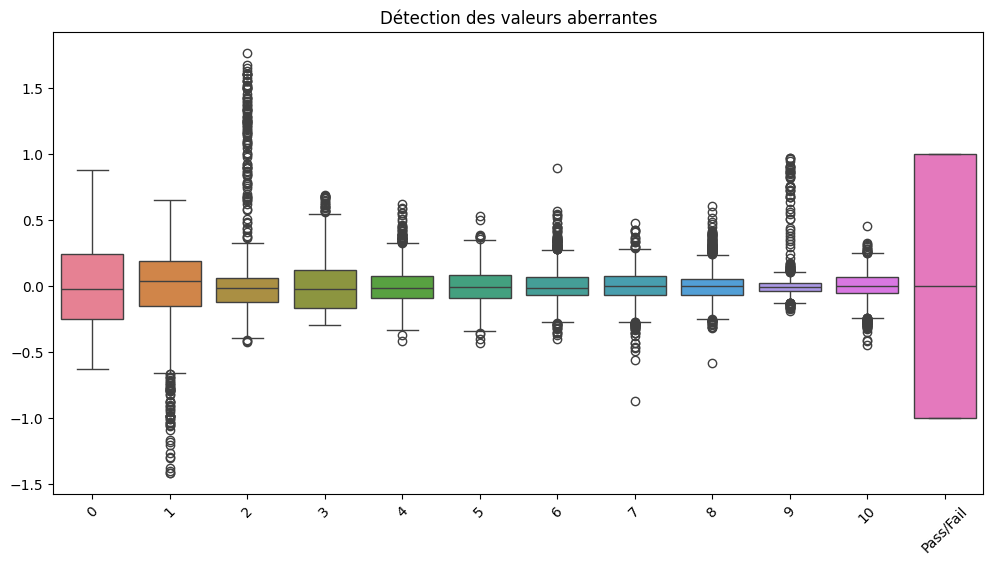

In [156]:
# Afficher les boxplots pour toutes les colonnes numériques

plt.figure(figsize=(12, 6))
sns.boxplot(data=pca_df)
plt.xticks(rotation=45)  # Rotation des noms de colonnes si nécessaire
plt.title("Détection des valeurs aberrantes")
plt.show()

In [157]:
# Définition d'une fonction pour détecter et supprimer les outliers
def remove_outliers(df):
    Q1 = df.quantile(0.25)  # 1er quartile
    Q3 = df.quantile(0.75)  # 3e quartile
    IQR = Q3 - Q1  # Interquartile Range

    # Définir les bornes pour détecter les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrer les données sans outliers
    df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

    return df_cleaned

# Supprimer les valeurs aberrantes
pca_df_cleaned = remove_outliers(pca_df)

print(f"Taille avant nettoyage : {pca_df.shape}")
print(f"Taille après nettoyage : {pca_df_cleaned.shape}")

Taille avant nettoyage : (2926, 12)
Taille après nettoyage : (2469, 12)


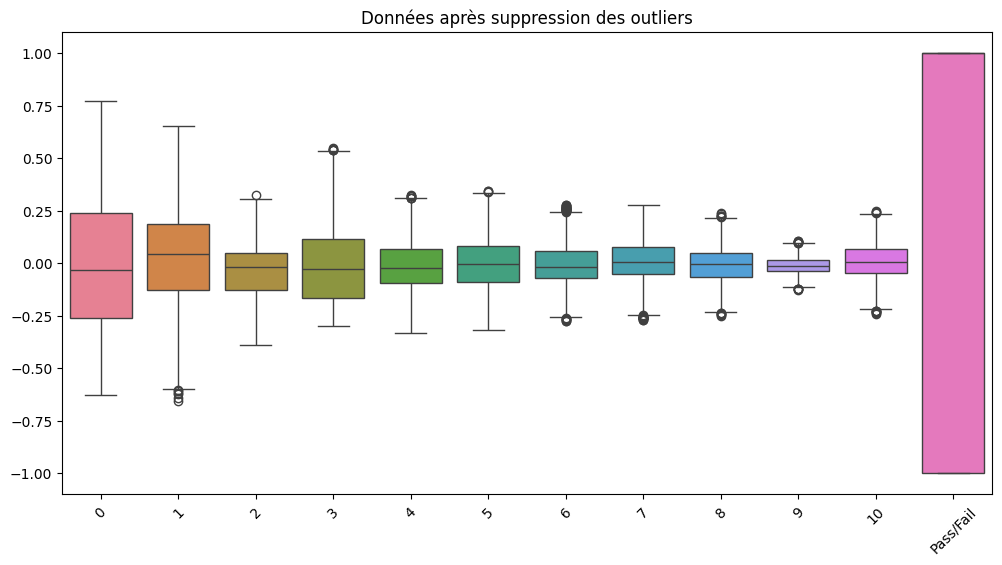

In [158]:
#Visualisation après nettoyage

plt.figure(figsize=(12, 6))
sns.boxplot(data=pca_df_cleaned)
plt.xticks(rotation=45)
plt.title("Données après suppression des outliers")
plt.show()

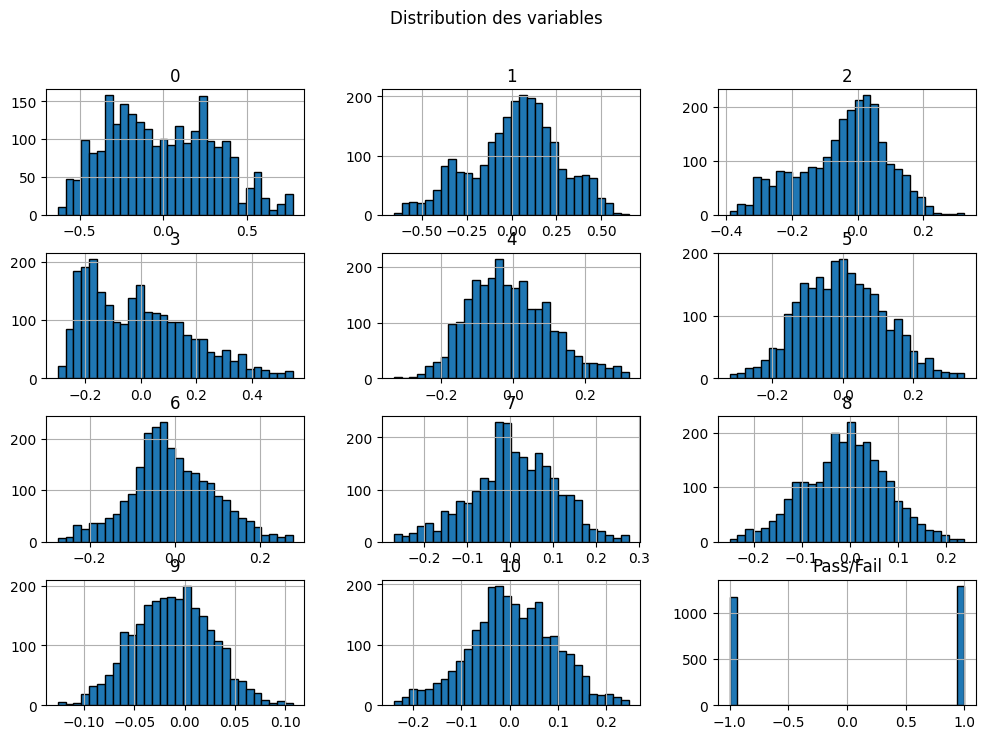

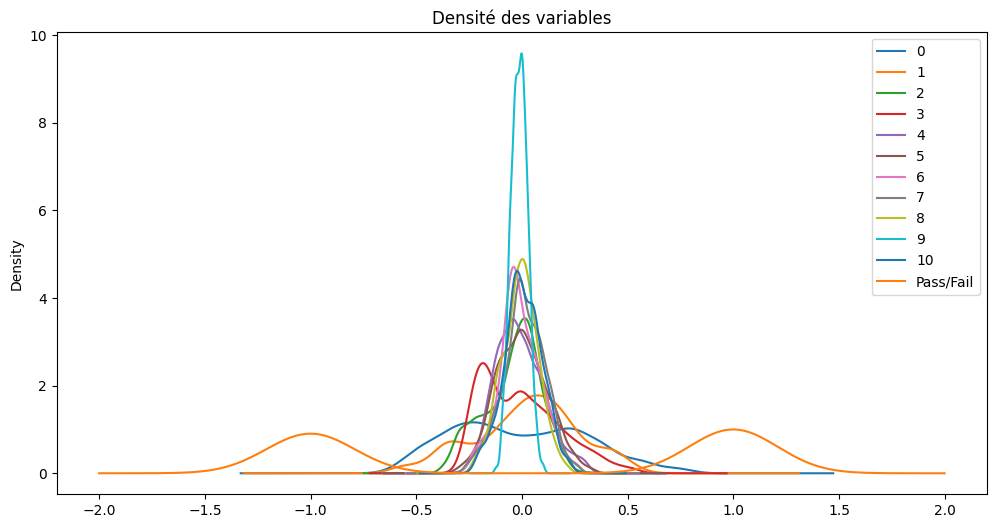

In [159]:
#Visualiser la distribution des données

# Histogramme de toutes les colonnes numériques
pca_df_cleaned.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribution des variables")
plt.show()

# Courbes de densité (plus lisible que l'histogramme)
pca_df_cleaned.plot(kind='kde', figsize=(12, 6), title="Densité des variables")
plt.show()

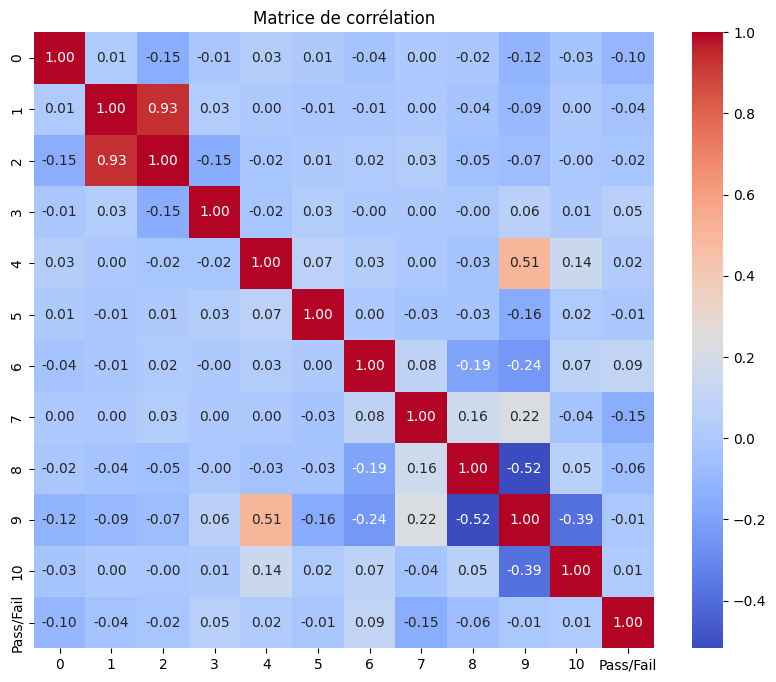

In [160]:
# Calculer la matrice de corrélation
correlation_matrix = pca_df_cleaned.corr()

# Créer la heatmap
plt.figure(figsize=(10, 8))  # Ajuster la taille de la figure si nécessaire
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

**4.Lancement de l'apprentissage**

In [161]:
# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

X = pca_df_cleaned.drop('Pass/Fail', axis=1)
y = pca_df_cleaned['Pass/Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% pour l'entraînement, 20% pour le test


Évaluation de Arbre de décision:


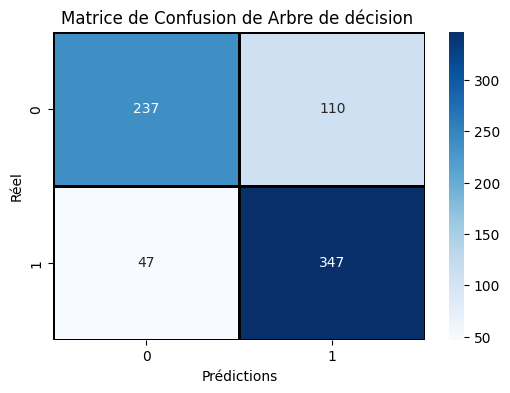

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.83      0.68      0.75       347
         1.0       0.76      0.88      0.82       394

    accuracy                           0.79       741
   macro avg       0.80      0.78      0.78       741
weighted avg       0.79      0.79      0.79       741


Évaluation de Forêt aléatoire:


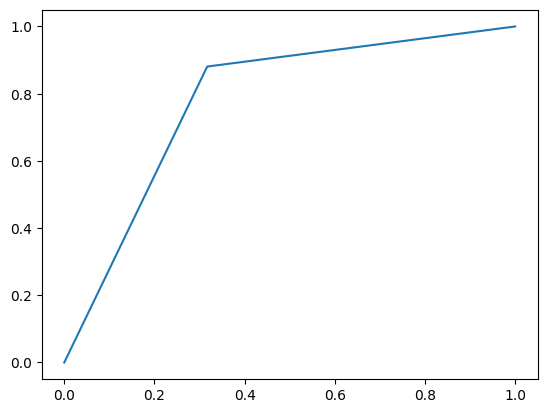

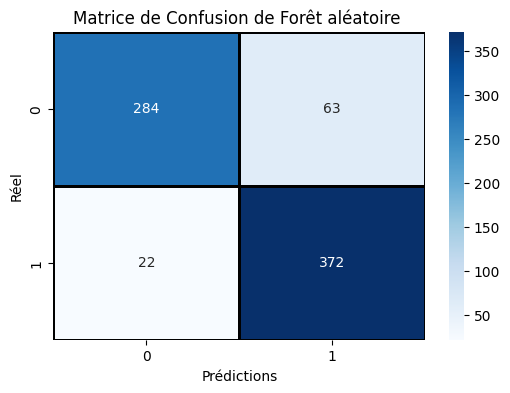

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.93      0.82      0.87       347
         1.0       0.86      0.94      0.90       394

    accuracy                           0.89       741
   macro avg       0.89      0.88      0.88       741
weighted avg       0.89      0.89      0.88       741



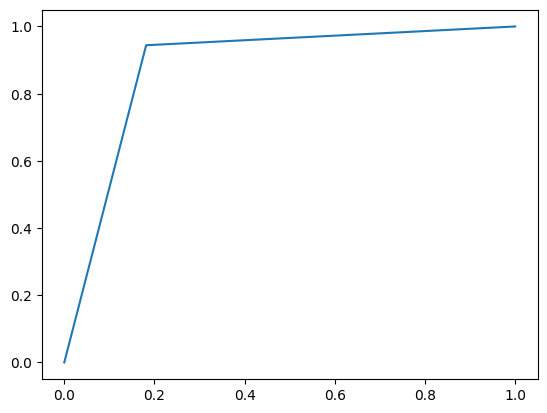

In [162]:
#entrainement des modèles

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Instancier les modèles avec des hyperparamètres
decision_tree = DecisionTreeClassifier(max_depth = 12, min_samples_split=8)
random_forest = RandomForestClassifier(n_estimators=200, max_depth=12)
# Entraîner les modèles
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Faire des prédictions
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Évaluer les modèles

# ... (Code pour l'instanciation, l'entraînement et la prédiction des modèles) ...

# Évaluer les modèles
for model_name, y_pred in [("Arbre de décision", y_pred_dt), ("Forêt aléatoire", y_pred_rf)]:
    print(f"\nÉvaluation de {model_name}:")

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    # Affichage sous forme de heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')
    plt.xlabel('Prédictions')
    plt.ylabel('Réel')
    plt.title(f'Matrice de Confusion de {model_name} ')
    plt.show()


    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))

 # ... (Code pour afficher la courbe ROC) ...

    # Courbe ROC et AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f}) - {model_name}')

**6.Validation simple et croisée**

In [163]:
#Validation simple
from sklearn.metrics import accuracy_score

# Evaluate with Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Simple Validation Accuracy: {accuracy}")

Simple Validation Accuracy: 0.8852901484480432


In [164]:
#Validation et croisée

from sklearn.model_selection import cross_validate
score = cross_validate(random_forest, X, y, cv=5, scoring=['accuracy'])

print(f"Cross-Validation Scores: {score}")
print(f"Average Cross-Validation Accuracy: {score['test_accuracy'].mean()}") # Access the 'test_accuracy' key to get the accuracy scores and then calculate the mean

Cross-Validation Scores: {'fit_time': array([5.03026628, 3.70466805, 3.26478696, 3.31818414, 2.74601364]), 'score_time': array([0.12819529, 0.04864883, 0.04334283, 0.08453155, 0.03520393]), 'test_accuracy': array([0.87449393, 0.89676113, 0.89878543, 0.88663968, 0.89046653])}
Average Cross-Validation Accuracy: 0.8894293386766965


**7.Optimisation des hyperparamètres**

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit

# Définir la validation croisée (6 splits, 30% des données en test)
cv = ShuffleSplit(n_splits=6, test_size=0.3, random_state=0)

# Définir la grille de recherche des hyperparamètres
param_grid = {
    "n_estimators": [50, 100, 200],  # Nombre d'arbres dans la forêt
    "max_depth": np.arange(1, 20),   # Profondeur maximale de l’arbre
}

# Initialiser le modèle de Random Forest
rf_model = RandomForestClassifier(random_state=0)

# Lancer la recherche d'hyperparamètres avec validation croisée
grid_search = GridSearchCV(rf_model, param_grid, cv=cv, scoring="accuracy", n_jobs=-1)
grid_search.fit(X, y)

GridSearchCV(cv=ShuffleSplit(n_splits=6, random_state=0, test_size=0.3, train_size=None),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [166]:
# Accéder aux meilleurs hyperparamètres
best_params = grid_search.best_params_
best_params

{'max_depth': np.int64(19), 'n_estimators': 200}

In [167]:
# Accéder au meilleur score
best_score = grid_search.best_score_
best_score

np.float64(0.9129554655870445)

**5.Sauvegarde du modèle le plus performant**

In [168]:
# Instancier le modèle avec les meilleurs hyperparamètres
random_forest = RandomForestClassifier(n_estimators=200, max_depth=19)
# Entraîner les modèles
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=19, n_estimators=200)

In [169]:
#Sauvegarde du modèle
import joblib

# ... (Code pour l'entraînement du modèle de forêt aléatoire) ...

# Sauvegarder le modèle
joblib.dump(random_forest, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [170]:
# tester la prédiction d'un jeu de données

import pandas as pd
from joblib import load

loaded_model = load('random_forest_model.pkl')

# Use .iloc to select the first row as a DataFrame, then access its values and reshape
prediction = loaded_model.predict(X_test.iloc[[1]].values.reshape(1, -1))
print("Prediction:", prediction)

Prediction: [1.]


** 8.Archivage avec WandB**

In [171]:
!pip install wandb

In [172]:
import wandb
from wandb.integration.keras import WandbMetricsLogger
import joblib

wandb.login()

True

In [173]:
# création du projet, avec un nom de run
wandb.init(project="ECC-pre", name="arbre de décision - jeu 2", reinit=True)

# résultat à archiver
report = classification_report(y_test, y_pred_rf,  output_dict=True)

#config à archiver
config = {
    "max_depth": 10,
}

wandb.config.update(config)

# log des résultats
# log des résultats
# Accessing the report with the correct key '-1.0' instead of '-1'
wandb.log({"precision_class_0": report["-1.0"]["precision"],
           "recall_class_0": report["-1.0"]["recall"],
           "f1_class_0": report["-1.0"]["f1-score"]})
wandb.log({"precision_class_1": report["1.0"]["precision"],
           "recall_class_1": report["1.0"]["recall"],
           "f1_class_1": report["1.0"]["f1-score"]})

#archiver le modèle dans le run
loaded_model = 'random_forest_model.pkl'
joblib.dump(random_forest, loaded_model)
wandb.save(loaded_model)
# archiver le modèle dans le model registry de wandb
artifact = wandb.Artifact("arbrededecision", type="model")
artifact.add_file(loaded_model)
wandb.log_artifact(artifact)

wandb.finish()

f1_class_0,▁
f1_class_1,▁
precision_class_0,▁
precision_class_1,▁
recall_class_0,▁
recall_class_1,▁
f1_class_0,0.86983
f1_class_1,0.89747
precision_class_0,0.9281
precision_class_1,0.85517
recall_class_0,0.81844
